# Introduction
The focus of this notebook will be on implementation of linear regression from scratch. The key issue is to forecast the how much time an woman athlete will take to complete 100 Meter race, base don historical trends.hence it is a very rough idea to determine of what will be happened.

Source:https://github.com/viveks-codes/Machine-learning-Deep-Learning-Python-Hand-written-notes-and-notebooks/blob/main/notebooks/data/DataWoman.csv

<font color='red'>Vivek Patel</font>

# What is the problem statement?
dataset is given :

The goal is to create a simple forecast of the year given by the client/user and hence the time taken by woman athlete and it's performance by understanding the link between year and their impact of time(sec) taken by woman athlete using linear Model using PyTorch

# Assumptions made
That time taken by woman athlete moves purely based on year. However, we understand that time taken by woman athlete can be affected by multiple different reasons and analysts often obtain information much earlier that journalists.

# Steps
- **Import dataset and required libraries**
- **Perform EDA**
- **convert whole dataset into numpy array**
- **apply random_split data and get**
- **move train dataset and validation dataset into DataLoader**
- **Define Model**
- **Train the model to fit the data**
- **Make predictions using the trained mode**

take year as input from user and forcast time taken by woman athlete to complete 100 meter race.

In [1]:
!pip install numpy matplotlib pandas torch==1.7.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [2]:
import numpy  as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split

In [3]:
dataframe = pd.read_csv('DataWoman.csv')
dataframe.head()

,X,Y
0,1928,12.20
1,1932,11.90
2,1936,11.15
3,1948,11.90
4,1952,11.50


In [4]:
num_rows = dataframe.shape[0]
print(num_rows)

21


In [5]:
num_cols = dataframe.shape[1]
print(num_cols)

2


In [6]:
input_cols = list(dataframe.columns)
input_cols = input_cols[:-1]
input_cols

['X']

In [7]:
output_cols = ['Y']

# Prepare the dataset for training

**We need to convert the data from the Pandas dataframe into a PyTorch tensors for training. To do this, the first step is to convert it numpy arrays. If you've filled out input_cols, and output_cols correctly, this following function will perform the conversion to numpy arrays.**

In [8]:
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # Convert non-numeric categorical columns to numbers
#     for col in categorical_cols:
#         dataframe1[col] = dataframe1[col].astype('category').cat.codes
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1[input_cols].to_numpy()
    targets_array = dataframe1[output_cols].to_numpy()
    return inputs_array, targets_array

In [9]:
inputs_array, targets_array = dataframe_to_arrays(dataframe)
inputs_array, targets_array

(array([[1928],
        [1932],
        [1936],
        [1948],
        [1952],
        [1956],
        [1960],
        [1964],
        [1968],
        [1972],
        [1976],
        [1980],
        [1984],
        [1988],
        [1992],
        [1996],
        [2000],
        [2004],
        [2008],
        [2012],
        [2016]]),
 array([[12.2 ],
        [11.9 ],
        [11.15],
        [11.9 ],
        [11.5 ],
        [11.5 ],
        [11.  ],
        [11.4 ],
        [11.  ],
        [11.07],
        [11.08],
        [11.06],
        [10.97],
        [10.54],
        [10.82],
        [10.94],
        [11.12],
        [10.93],
        [10.78],
        [10.75],
        [10.71]]))

In [10]:
inputs = torch.from_numpy(inputs_array)
targets = torch.from_numpy(targets_array)

inputs = inputs.to(torch.float32)
targets = targets.to(torch.float32)

In [11]:
inputs.dtype, targets.dtype

(torch.float32, torch.float32)

Next, we need to create PyTorch datasets & data loaders for training & validation. We'll start by creating a `TensorDataset`.

In [12]:
dataset = TensorDataset(inputs, targets)

In [13]:
len(dataset)

21

In [14]:
type(dataset)

torch.utils.data.dataset.TensorDataset

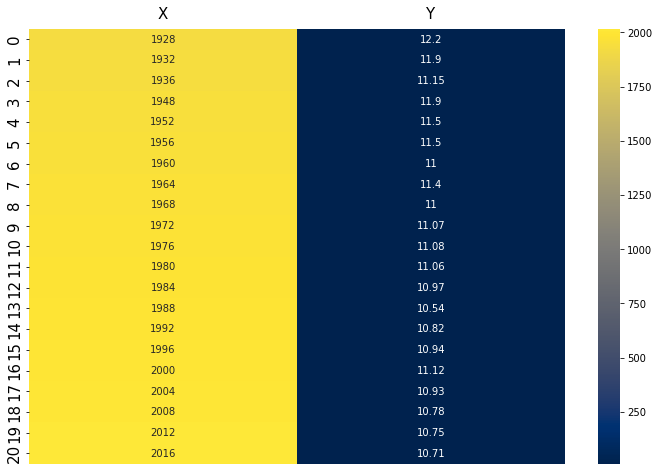

In [15]:
import seaborn as sns
fig, ax = plt.subplots(1, figsize=(12,8))
plt.tick_params(axis='both', which='major', labelsize=15, labelbottom = False, bottom=False, top = False, labeltop=True)
ax = sns.heatmap(data=dataframe,cmap="cividis",annot=True,fmt='g')

# Let's apply random split on dataset

In [16]:
from torch.utils.data import random_split

val_percent = 0.1 # between 0.1 and 0.2
val_size = int(num_rows * val_percent)
train_size = num_rows - val_size

train_ds, val_ds = random_split(dataset, [18,3])

Finally, we can create data loaders for training & validation.

In [17]:
batch_size = 3
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

Let's look at a batch of data to verify everything is working fine so far.

In [18]:
for xb, yb in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break

inputs: tensor([[1992.],
        [1972.],
        [1968.]])
targets: tensor([[10.8200],
        [11.0700],
        [11.0000]])


# Create a Linear Regression Model

Our model itself is a fairly straightforward linear regression.

In [32]:
input_size = len(input_cols)
output_size = len(output_cols)
input_size , output_size

(1, 1)

Think carefully about picking a good loss fuction (it's not cross entropy). Maybe try 2-3 of them and see which one works best. See https://pytorch.org/docs/stable/nn.functional.html#loss-functions I've taken mean squeared error as loss fn

In [109]:
class WomanModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        self.linear2 = nn.Linear(input_size, output_size)
        self.linear3 = nn.Linear(input_size, output_size)
        self.linear4 = nn.Linear(input_size, output_size)
        self.linear5 = nn.Linear(input_size, output_size)
        self.linear6 = nn.Linear(input_size, output_size)
        self.linear7 = nn.Linear(input_size, output_size)
        self.linear8 = nn.Linear(input_size, output_size)
        self.linear9 = nn.Linear(input_size, output_size)
        self.linear10 = nn.Linear(input_size, output_size)
        self.linear11 = nn.Linear(input_size, output_size)
        self.linear12 = nn.Linear(input_size, output_size)
    def forward(self, xb):
        xb = xb
        out = self.linear(xb)
        out = self.linear2(xb)
        out = self.linear3(xb)
        out = self.linear4(xb)
        out = self.linear5(xb)
        out = self.linear6(xb)
        out = self.linear7(xb)
        out = self.linear8(xb)
        out = self.linear9(xb)
        out = self.linear10(xb)
        out = self.linear11(xb)
        out = self.linear12(xb)
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calcuate loss
        loss = F.l1_loss(out, targets)                          
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss = F.mse_loss(out, targets)                            
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return epoch_loss.item()
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result))

Let us create a model using the `WomanModel` class. You may need to come back later and re-run the next cell to reinitialize the model, in case the loss becomes `nan` or `infinity`.

In [110]:
model = WomanModel()

Let's check out the weights and biases of the model using `model.parameters`.

In [111]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.6728]], requires_grad=True),
 Parameter containing:
 tensor([0.7207], requires_grad=True),
 Parameter containing:
 tensor([[0.8485]], requires_grad=True),
 Parameter containing:
 tensor([0.6179], requires_grad=True),
 Parameter containing:
 tensor([[-0.2406]], requires_grad=True),
 Parameter containing:
 tensor([-0.2562], requires_grad=True),
 Parameter containing:
 tensor([[-0.6048]], requires_grad=True),
 Parameter containing:
 tensor([0.9393], requires_grad=True),
 Parameter containing:
 tensor([[0.2860]], requires_grad=True),
 Parameter containing:
 tensor([-0.4063], requires_grad=True),
 Parameter containing:
 tensor([[0.3253]], requires_grad=True),
 Parameter containing:
 tensor([-0.1694], requires_grad=True),
 Parameter containing:
 tensor([[0.1150]], requires_grad=True),
 Parameter containing:
 tensor([-0.6864], requires_grad=True),
 Parameter containing:
 tensor([[-0.4505]], requires_grad=True),
 Parameter containing:
 tensor([-0.5378], requ

# Train the model to fit the data

To train our model, we'll use the same `fit` function . That's the benefit of defining a generic training loop - you can use it for any problem.

In [112]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            # print(loss)
            # print(epoch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [113]:
result = evaluate(model,val_loader) # Use the the evaluate function
print(result)

1989298.375



We are now ready to train the model. You may need to run the training loop many times, for different number of epochs and with different learning rates, to get a good result. Also, if your loss becomes too large (or `nan`), you may have to re-initialize the model by running the cell `model = WomanModel()`. Experiment with this for a while, and try to get to as low a loss as possible.

In [114]:
epochs = 100
lr = 1e-2
history1 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 66686.3438
Epoch [40], val_loss: 458636.0000
Epoch [60], val_loss: 4187125.7500
Epoch [80], val_loss: 6338362.5000
Epoch [100], val_loss: 2318062.0000


In [115]:
epochs = 100
lr = 1e-3
history2 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 2945683.2500
Epoch [40], val_loss: 935770.6875
Epoch [60], val_loss: 1536849.3750
Epoch [80], val_loss: 1589233.0000
Epoch [100], val_loss: 2580253.2500


In [116]:
epochs = 100
lr = 1e-4
history3 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 2173.7842
Epoch [40], val_loss: 4926.9116
Epoch [60], val_loss: 5225.3940
Epoch [80], val_loss: 2799.3176
Epoch [100], val_loss: 800.5119


In [117]:
epochs = 1000
lr = 1e-5
history4 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 1258.0024
Epoch [40], val_loss: 1072.2328
Epoch [60], val_loss: 830.4208
Epoch [80], val_loss: 860.8770
Epoch [100], val_loss: 1103.3191
Epoch [120], val_loss: 1031.4647
Epoch [140], val_loss: 1265.4391
Epoch [160], val_loss: 200.3194
Epoch [180], val_loss: 210.8294
Epoch [200], val_loss: 140.4078
Epoch [220], val_loss: 363.8936
Epoch [240], val_loss: 348.0854
Epoch [260], val_loss: 350.0417
Epoch [280], val_loss: 439.3763
Epoch [300], val_loss: 234.2572
Epoch [320], val_loss: 206.2914
Epoch [340], val_loss: 139.1687
Epoch [360], val_loss: 237.4735
Epoch [380], val_loss: 72.2240
Epoch [400], val_loss: 48.7260
Epoch [420], val_loss: 55.5248
Epoch [440], val_loss: 114.4351
Epoch [460], val_loss: 135.4878
Epoch [480], val_loss: 297.3232
Epoch [500], val_loss: 264.0001
Epoch [520], val_loss: 220.0521
Epoch [540], val_loss: 136.7094
Epoch [560], val_loss: 90.1208
Epoch [580], val_loss: 98.2488
Epoch [600], val_loss: 56.3076
Epoch [620], val_loss: 54.7472
Epoch [640], v

In [118]:
epochs = 1000
lr = 1e-6
history4 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 6.4067
Epoch [40], val_loss: 3.8989
Epoch [60], val_loss: 6.3823
Epoch [80], val_loss: 7.0855
Epoch [100], val_loss: 5.1341
Epoch [120], val_loss: 5.9171
Epoch [140], val_loss: 2.9772
Epoch [160], val_loss: 2.6137
Epoch [180], val_loss: 1.9305
Epoch [200], val_loss: 1.1921
Epoch [220], val_loss: 2.5625
Epoch [240], val_loss: 4.6490
Epoch [260], val_loss: 1.6673
Epoch [280], val_loss: 4.2541
Epoch [300], val_loss: 3.6552
Epoch [320], val_loss: 5.7142
Epoch [340], val_loss: 4.6715
Epoch [360], val_loss: 2.5625
Epoch [380], val_loss: 2.1807
Epoch [400], val_loss: 2.1052
Epoch [420], val_loss: 3.2878
Epoch [440], val_loss: 2.9938
Epoch [460], val_loss: 1.6409
Epoch [480], val_loss: 1.9438
Epoch [500], val_loss: 1.5120
Epoch [520], val_loss: 2.7998
Epoch [540], val_loss: 2.0310
Epoch [560], val_loss: 0.9204
Epoch [580], val_loss: 6.8651
Epoch [600], val_loss: 9.3537
Epoch [620], val_loss: 8.3601
Epoch [640], val_loss: 6.6752
Epoch [660], val_loss: 8.9433
Epoch [680], v

In [125]:
epochs = 1000
lr = 1e-9
history4 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 0.1291
Epoch [40], val_loss: 0.1306
Epoch [60], val_loss: 0.1294
Epoch [80], val_loss: 0.1296
Epoch [100], val_loss: 0.1297
Epoch [120], val_loss: 0.1298
Epoch [140], val_loss: 0.1286
Epoch [160], val_loss: 0.1287
Epoch [180], val_loss: 0.1302
Epoch [200], val_loss: 0.1290
Epoch [220], val_loss: 0.1291
Epoch [240], val_loss: 0.1307
Epoch [260], val_loss: 0.1308
Epoch [280], val_loss: 0.1282
Epoch [300], val_loss: 0.1297
Epoch [320], val_loss: 0.1298
Epoch [340], val_loss: 0.1286
Epoch [360], val_loss: 0.1287
Epoch [380], val_loss: 0.1289
Epoch [400], val_loss: 0.1304
Epoch [420], val_loss: 0.1305
Epoch [440], val_loss: 0.1293
Epoch [460], val_loss: 0.1281
Epoch [480], val_loss: 0.1296
Epoch [500], val_loss: 0.1297
Epoch [520], val_loss: 0.1298
Epoch [540], val_loss: 0.1286
Epoch [560], val_loss: 0.1301
Epoch [580], val_loss: 0.1303
Epoch [600], val_loss: 0.1290
Epoch [620], val_loss: 0.1292
Epoch [640], val_loss: 0.1293
Epoch [660], val_loss: 0.1294
Epoch [680], v

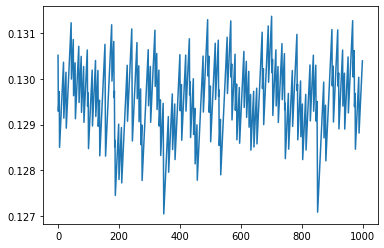

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.plot(history5)
plt.plot(history4)

# Make predictions using the trained model

In [127]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(input)              
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)

In [128]:
input, target = val_ds[0]
predict_single(input, target, model)

Input: tensor([1976.])
Target: tensor([11.0800])
Prediction: tensor(10.9936)


In [129]:
input, target = val_ds[1]
predict_single(input, target, model)

Input: tensor([1960.])
Target: tensor([11.])
Prediction: tensor(10.9086)


In [130]:
def predict_cstm(input, model):
    inputs = input
    predictions = model(input)                
    prediction = predictions[0].detach()
    print("Input:", input)
    #print("Target:", target)
    print("Prediction:", prediction)

In [131]:
predict_cstm(torch.tensor([2020.]),model)

Input: tensor([2020.])
Prediction: tensor(11.2275)


In [90]:
predict_cstm(torch.tensor([2024.]),model)

Input: tensor([2024.])
Prediction: tensor(11.2612)


Are you happy with your model's predictions? Try to improve them further.